In [1]:
from typing import Iterator, Callable
from functools import reduce

import numpy as np
import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt

from solved_helium_eq import solved, lambdified

In [2]:
exp = (
    pd
    .read_excel("data/Simulated and experimental He beta parameters, TDSE.xlsx", sheet_name="Experiment")
    .set_index('photon (eV)')
)
exp

,dataset,beta1,beta1_err,beta2,beta2_err,beta3,beta3_err,beta4,beta4_err
photon (eV),,,,,,,,,
14.3,wonly3,-0.085455,0.008100,0.550593,0.018332,-0.089304,0.007507,1.738617,0.049251
15.9,wonly5,-0.144728,0.006231,1.149896,0.042160,-0.084473,0.004367,1.562401,0.049205
19.1,wonly4,-0.065799,0.010539,1.555580,0.090389,-0.161309,0.048274,2.238745,0.057671


In [37]:
# cos eta_sd
p = (18 / 7 / exp["beta4"] - 1) ** 0.5
print("P:")
print(p)
print()
print("eta_sd:")
print(np.arccos(5 ** 0.5 / p * ((1 + p ** 2) / 10 * exp["beta2"] - 1 / 7)))
print()
print("eta_sd with flipped P sign:")
print(np.arccos(- 5 ** 0.5 / p * ((1 + p ** 2) / 10 * exp["beta2"] - 1 / 7)))

P:
photon (eV)
14.3    0.692104
15.9    0.803628
19.1    0.385490
Name: beta4, dtype: float64

eta_sd:
photon (eV)
14.3    1.770573
15.9    1.441343
19.1    1.361511
dtype: float64

eta_sd with flipped P sign:
photon (eV)
14.3    1.371020
15.9    1.700250
19.1    1.780081
dtype: float64


In [9]:
the = pd.read_excel('Data/the_helium.xlsx').set_index('photon (eV)')
the['coeff_p'] = 0
the = the[['coeff_s', 'coeff_p', 'coeff_d', 'eta_s', 'eta_p', 'eta_d']]
for k, v in lambdified(**the[['coeff_s', 'coeff_p', 'coeff_d', 'eta_s', 'eta_p', 'eta_d']]).items():
    the[k] = v
the

,coeff_s,coeff_p,coeff_d,eta_s,eta_p,eta_d,beta1_amp,beta1_shift,beta2,beta3_amp,beta3_shift,beta4,beta1m3_amp,beta1m3_shift
photon (eV),,,,,,,,,,,,,,
14.3,0.003220,0,-0.01090,5.36,2.26,0,0.0,1.199396,0.580867,-0.0,-2.26,2.365035,0.0,3.10
15.0,0.002530,0,-0.01020,5.22,2.19,0,0.0,1.224701,0.837822,-0.0,-2.19,2.422394,0.0,3.03
15.9,0.001770,0,-0.00928,5.07,2.12,0,0.0,1.234198,1.090330,-0.0,-2.12,2.481166,0.0,2.95
16.0,0.001690,0,-0.00917,5.06,2.11,0,0.0,1.237004,1.110101,-0.0,-2.11,2.486958,0.0,2.95
17.0,0.000986,0,-0.00824,4.94,2.06,0,0.0,1.215183,1.289356,-0.0,-2.06,2.535129,0.0,2.88
18.0,0.000339,0,-0.00745,4.84,2.01,0,0.0,1.182339,1.399775,-0.0,-2.01,2.566115,0.0,2.83
19.0,-0.000392,0,-0.00684,4.77,1.98,0,0.0,1.097946,1.438604,-0.0,-1.98,2.563011,-0.0,2.79
19.1,-0.000601,0,-0.00673,4.76,1.98,0,0.0,1.062659,1.436126,-0.0,-1.98,2.551084,-0.0,2.78
19.5,-0.001020,0,-0.00661,4.73,1.97,0,0.0,1.001282,1.407215,-0.0,-1.97,2.511622,-0.0,2.76


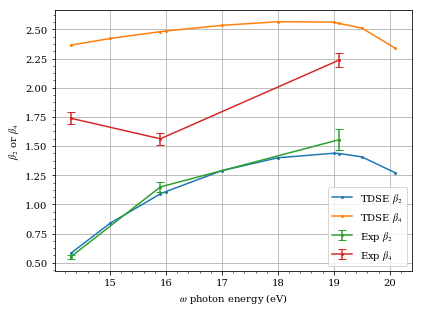

In [16]:
plt.style.use("Report.mplstyle")
plt.figure()
plt.xlabel(r"$\omega$ photon energy (eV)")
plt.ylabel(r"$\beta_2$ or $\beta_4$")
plt.plot(the["beta2"], ".-", label=r"TDSE $\beta_2$")
plt.plot(the["beta4"], ".-", label=r"TDSE $\beta_4$")
plt.errorbar(exp.index, exp["beta2"], yerr=exp["beta2_err"], fmt=".-", label=r"Exp $\beta_2$")
plt.errorbar(exp.index, exp["beta4"], yerr=exp["beta4_err"], fmt=".-", label=r"Exp $\beta_4$")
plt.grid(True)
plt.legend()
plt.savefig("Figures/Compare wonly beta parameters.pdf")
plt.show()